In [2]:
import sympy


# define exp
def exp():
    var_x = sympy.symbols("var_x")
    return var_x * var_x - 1, var_x


# calculate symbol diff
def cal_grad(exp, var_x):
    return sympy.diff(exp, var_x)


# naive grad descent
def grad_descent(exp, var_x, learning_rate, initial_location, max_times=100):
    current_location = initial_location
    current_grad = cal_grad(exp, var_x).subs(var_x, current_location)
    grad_count = 0
    while current_grad != 0 and grad_count != max_times:
        # print(current_grad)
        # print(grad_count)
        grads_dict[current_location] = current_grad
        current_location = current_location - learning_rate * current_grad
        current_grad = cal_grad(exp, var_x).subs(var_x, current_location)
        grad_count += 1
    if current_location < -999999 or current_location > 999999:
        print("the function doesn't converge.")
        return None
    return current_location


exp, var_x = exp()
grads_dict = {}
min_value_pos = grad_descent(exp, var_x, 0.001, 10, 1000)
if min_value_pos != None:
    min_value = exp.subs(var_x, min_value_pos)
    print(f"minvalue is: {min_value}\tminvalue position: {min_value_pos}")
# print(grads_dict)

minvalue is: 0.824242522375074	minvalue position: 1.35064522446684


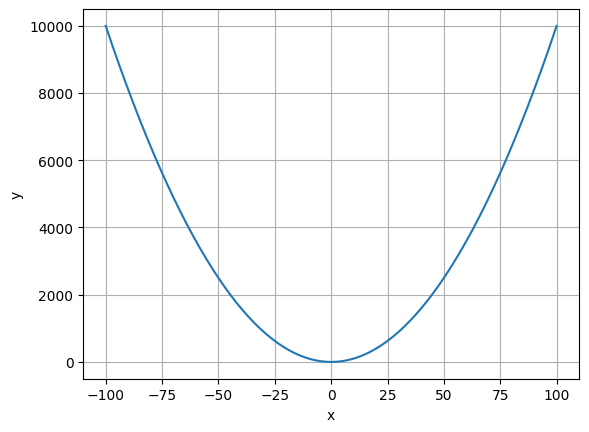

In [ ]:
import matplotlib.pyplot as plt

# function pic
var_x_list = [var_x for var_x in range(-100, 101)]
func_value_list = [exp.subs(var_x, var_x_pos) for var_x_pos in var_x_list]
plt.plot(var_x_list, func_value_list)

plt.xlabel("x")
plt.ylabel("y")

plt.grid(True)
plt.show()

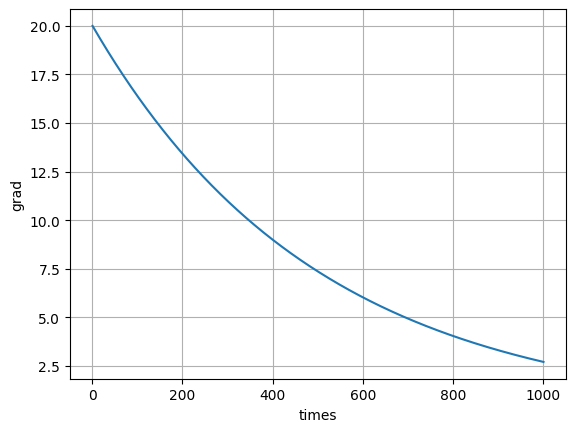

In [ ]:
# grad descent by times pic

plt.plot([count + 1 for count in range(len(grads_dict.keys()))], grads_dict.values())

plt.xlabel("times")
plt.ylabel("grad")

plt.grid(True)
plt.show()

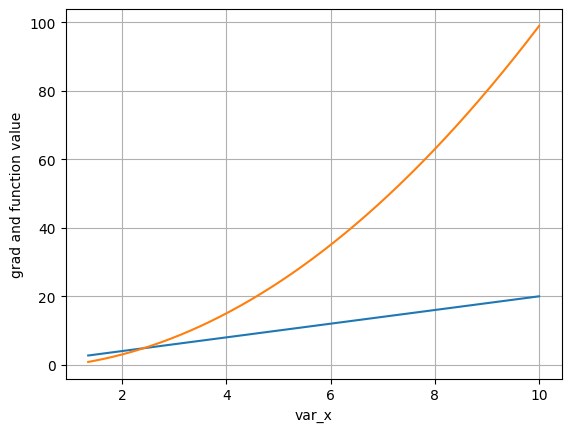

In [5]:
# function pic and grad descent pic
func_value_list = [exp.subs(var_x, var_x_value) for var_x_value in grads_dict.keys()]

plt.plot(grads_dict.keys(), grads_dict.values())
plt.plot(grads_dict.keys(), func_value_list)

plt.xlabel("var_x")
plt.ylabel("grad and function value")

plt.grid(True)
plt.show()